<a href="https://colab.research.google.com/github/pratikgujral/Learn_LinearAlgebra/blob/main/Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sympy

# Gaussian Elimination

Given a system of linear equations:  
$-x -y + 3z = 3$  
$x + z = 3$  
$3x -y + 7z = 15$

<br/>

This is solved by converting the system of equations to Row Echelon form.

Reduced Row Echelon Form can be computed using **`sympy.Matrix.rref()`**

In [ ]:
A = sympy.Matrix([
                  [-1,-1,3,-3],
                  [1,0,1,-3],
                  [3,-1,7,-15]
                ])
A

Matrix([
[-1, -1, 3,  -3],
[ 1,  0, 1,  -3],
[ 3, -1, 7, -15]])

**`A.rref()`** returns the Reduced Row Echelon Form and also the index of the Pivot columns in `A`.

In [ ]:
A_rref, pivot_col_indices = A.rref()

print(pivot_col_indices)
A_rref

(0, 1)


Matrix([
[1, 0,  1, -3],
[0, 1, -4,  6],
[0, 0,  0,  0]])

**Another Example...(Determined System)**  
Find the reduced row echelon form, and pivot columns of given system of equations.

NOTE: The given system of equations represents a determined system.

In [ ]:
A = sympy.Matrix([
                  [1,2,2,2],
                  [2,4,6,8],
                  [3,6,8,10]
])
A

Matrix([
[1, 2, 2,  2],
[2, 4, 6,  8],
[3, 6, 8, 10]])

In [ ]:
A.rref()

(Matrix([
 [1, 2, 0, -2],
 [0, 0, 1,  2],
 [0, 0, 0,  0]]), (0, 2))

**Example of solving an overdermined system**

In [ ]:
A = sympy.Matrix([
                  [1,2,3],
                  [2,4,6],
                  [2,8,10]
])
A

Matrix([
[1, 2,  3],
[2, 4,  6],
[2, 8, 10]])

NOTE: We do have 3 cols, but all 3 columns are not independent.   
$R_3 <= R_1 + R_2$ 

In [ ]:
A.rref()

(Matrix([
 [1, 0, 1],
 [0, 1, 1],
 [0, 0, 0]]), (0, 1))

## Rank

Rank = # of pivot columns in A.

In [ ]:
A.rank()

2

---
## Gaussian elimination implementation (recursive)
$2x + y - z = 8$  
$-3x -y + 2z = -11$  
$-2x + y + 2z = -3$

In [ ]:
A = [
    [2, 1, -1],
    [-3, -1, 2],
    [-2, 1, 2]
]

b = [8, -11, -3]


def reduce(A, b, i):
    if i == len(A):
        return
    if A[i][i] == 0:
        #swap as need non zero pivot
        for j in range(i + 1, len(A)):
            if A[j][i] != 0:
                A[i], A[j] = A[j], A[i]
                break
    if A[i][i] == 0:
        #no pivots
        reduce(A, b, i + 1)

    pivot = float(A[i][i])
    A[i] = [v/pivot for v in A[i]]
    b[i] = b[i]/pivot

    for j in range(i + 1, len(A)):
        to_zero = A[j][i]
        A[j] = [v_row - to_zero * v_pivot for v_row, v_pivot in zip(A[j], A[i])]
        b[j] = b[j] - to_zero * b[i]

    reduce(A, b, i + 1)

reduce(A, b, 0)

print(A)
print(b)

[[1.0, 0.5, -0.5], [0.0, 1.0, 1.0], [-0.0, -0.0, 1.0]]
[4.0, 2.0, -1.0]


## Null Space of matrix

Null space of a matrix $A$ is defined as a set of all the vectors $X$ that satisfy $A.X=0$

Steps to compute null space:
1. Convert to reduced row echelon form using Gaussian Elimination
2. Pick any values for the free variables. So if we have two free variables `f1` and `f2`, we assume their values to be `(1, 0)` and `(0, 1)`. We don't choose `(0,0)` as that is a trivial; solution to $A.X=0$.

In [ ]:
A = sympy.Matrix([
                  [1,2,3],
                  [2,4,6],
                  [2,8,10]
])
print(A)

Matrix([[1, 2, 3], [2, 4, 6], [2, 8, 10]])


In [ ]:
A.nullspace()

[Matrix([
 [-1],
 [-1],
 [ 1]])]

We can verify that this is indeed the nullspace of A by verifying that $A.X=0$

In [ ]:
A @ A.nullspace()[0]

Matrix([
[0],
[0],
[0]])

---

# Solving $A.X=B$
Depending on the shape of $A$, the given system can be classified into 
1. Underdetermined System
2. Determined System
3. Overdetermined System

## Goal 
Check if a solution exists to a given system of equations, and if it does, find all those solutions.

<br/>

Example:
```
x + y + z = 1 
x + y + 2z = 3
```

This can be solved via Sympy in a variety of ways.

1. Augmented Matrix form
2. System of Equations
3. $A.x=b$ form

### Augmented Matrix Form

In [ ]:
from sympy import Matrix, symbols
from sympy.solvers.solveset import linsolve

A = sympy.Matrix([
                  [1,1,1,1],
                  [1,1,2,3]
])

A

Matrix([
[1, 1, 1, 1],
[1, 1, 2, 3]])

In [ ]:
# Create Sympy symbols for representing variables of the given system of equations
x, y, z = symbols('x y z')

linsolve(A, (x, y, z))

FiniteSet((-y - 1, y, 2))

### System of equations form

In [ ]:
# Create Sympy symbols
x, y, z = symbols('x y z')

linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

FiniteSet((-y - 1, y, 2))

### $A.x=b$ form

In [ ]:
M = sympy.Matrix([
                  [1,1,1,1],
                  [1,1,2,3]
])

M

Matrix([
[1, 1, 1, 1],
[1, 1, 2, 3]])

In [ ]:
system = A, b = M[:, :-1], M[:, -1]

print(A)
print(b)
print(system)

Matrix([[1, 1, 1], [1, 1, 2]])
Matrix([[1], [3]])
(Matrix([
[1, 1, 1],
[1, 1, 2]]), Matrix([
[1],
[3]]))


In [ ]:
linsolve(system, x, y, z)

FiniteSet((-y - 1, y, 2))

---
# Solving linear system of equations

$A.x = b$

We can use Gaussian elimination to solve the system of equations. However the time complexity of performing Gaussian Elimination is $O(n^3)$.  

If $A$ is a suare matrix, then there are couple of approximation techniques that can be used to speed up the solution auch as:
- Jacobi Iterations
- Gauss Seidel

In [ ]:
import numpy as np

A = np.array([
             [3,2,1],
             [1,4,4],
             [3,2,8]
])

b = np.array([
              [8],
              [13],
              [15]
])

print(A)
print(b)

[[3 2 1]
 [1 4 4]
 [3 2 8]]
[[ 8]
 [13]
 [15]]


## Jacobi Iterations (for determined systems)

$A = D + E$   

$A$ : (m * m) matrix  
$D$ : (m * m) matrix containing only diagonal elements of A  
$E$ : (m * m) matrix containing only non-diagonal elements of A


### Derivation
$b = Ax$  
$b = (D + E) x$  
$b = Dx + Ex$  
$Dx = -Ex + b$  
$x = -D^{-1}Ex + D^{-1}b$  


### Algorithm

- Initialize:
  $x = x_0$

- For kth iteration  
    $x^{k} = -D^{-1} E x^{k-1} + D^{-1}b$
- Find error

### Conditions for Jacobi to converge
- For Jacobi iterations to converge, our system should exhibit **Diagonal Dominance**.

#### Diagonal Dominance
$|A_{ii}| - \sum \limits_{i \ne j}{|A_{ij}|} > 0$  


So for a given matrix,
\begin{equation*}
A = 
\begin{pmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{pmatrix}
\end{equation*}

$|a_{11}| > |a_{12}| + |a_{13}|$,  
$|a_{21}| > |a_{22}| + |a_{23}|$, and   
$|a_{31}| > |a_{32}| + |a_{33}|$

If there is diagonal dominance, Jacobi will converge, else it will not converge.

$x_i^{k+1} = -\frac{1}{A_{ii}} (\sum\limits_{j \neq i} A_{ij} - b_i)$
    


Algorithm:

1. Initialize:  $x = x_0$ 

2. Repeat until convergence of for fixed number of iterations:   
For kth iteration:  $x_k = −D^{−1}E x_{k−1} + D^{−1}b$

Note: Since expression $D^{−1}b$ does not change inside the loop, we can compute it once and then use it inside the loop instead of recomputing.


In [ ]:
# Implement here
def my_jacobi(A, b, max_iter=None, epsilon=None):
  """Implements Jacobi iteration for finding solution to Determined systems Ax=b.
  
  Need to provide a value for one of max_iter and epsilon. 
  If both are provided, max_iter takes precedence.

  A : Sq. Matrix (ndarray) of size (mxm) 
  b : Vector of (ndarray) length (m)
  max_iter : int or None. Numbe rof iterations to run on
  epsilon : float or None. Represents max. permissible normalized L2 norm of error in approximation
  """

  # Getting shape of A
  m = A.shape[0]

  # Creating D, E such that D= diag elem of A; E = off-diag elem of A
  D = np.zeros((m,m))
  np.fill_diagonal(D, A.diagonal()) # Happens inplace
  
  E = A.copy()
  np.fill_diagonal(E, 0) # Inplace replacement

  # Initialize x
  x = np.random.randn(m)

  # Precomputing D inverse b
  D_inv = np.linalg.inv(D)
  Dinv_b = D_inv @ b
  Dinv_E = D_inv @ E

  if max_iter is not None:
    # Iterate for fixed number of times
    for k in range(max_iter):
      x = - Dinv_E @ x + Dinv_b

  else:
    # Iterate until error becomes smaller than provided epsilon
    
    epsilon_hat = np.inf

    while epsilon < epsilon_hat:
      # Calcualte error
      b_hat = A @ x
    
      epsilon_hat = ((b - b_hat)**2).sum() / (b**2).sum()

      # Update x
      x = - Dinv_E @ x + Dinv_b
  return x

Evaluating Jacobi iteration.

In [ ]:
A = np.array([
               [4,1,2],
               [4,7,1],
               [0,7,9]
              ])
b = np.array([8, 19, 23])
# x should be [1,2,1]

# Using fixed number of iterations
print('-'*10, 'Using fixed number of iterations', '-'*10)
x = my_jacobi(A, b, 100)
print('x: \t', x)

# Verifying
print('A @ x: \t', A @ x)

print('\n')
######
# Using epsilon error
print('-'*10, 'Using error threshold', '-'*10)
x = my_jacobi(A, b, epsilon=0.00000001)
print('x: \t', x)

# Verifying
print('A @ x: \t', A @ x)

---------- Using fixed number of iterations ----------
x: 	 [1. 2. 1.]
A @ x: 	 [ 8. 19. 23.]


---------- Using error threshold ----------
x: 	 [0.99990333 1.999907   0.99990275]
A @ x: 	 [ 7.99932584 18.99886506 22.99847375]


-----

Solving  
3x - 2y = 5  
x  + 2y = -1

In [ ]:
A = np.array([
              [3,-2],
              [1, 2]
])

b = np.array([5, -1])

print(A)
print(b)

x = my_jacobi(A, b, epsilon=0.000001)
print('x:', x)

print(A @ x)


[[ 3 -2]
 [ 1  2]]
[ 5 -1]
x: [ 1.00029364 -1.00086233]
[ 5.00260559 -1.00143102]


---
---

## Gauss Seidel (for determined systems)

To solve $Ax=b$ where A represents a determined system, we write $A$ as a sum of lower and upper triangular matrices.  
**Note:** Lower traingular matrix will include the diagonal elements as well.

$A = L_* + U$  
$Ax = b$  
$(L_* + U)x = b$  
$L_* x + Ux = b$  
$L_* x = b - Ux$

Iterations.....  
$L_* x^{k+1} = b - Ux^{k}$

<br/>

Hence,  
$x^{k+1} = L_*^{-1} (b - Ux^{k})$

<br/>

We do not directly compute $L^{-1}$ as that is going to be computationally expensive.

We start with some $x=x_0$  
Then, $b - Ux_0 = v_1$

Since, $L_* x^{k+1} = b - Ux^{k}$, substituting above value, expression becomes,  
$L_* x^{k+1} = v_1$

#### Algorithm
```
init: x := x_0

For k iterations:
  v = b - U x^{k-1} (Value of x from previous iteration)
  L_star @ x  = v  (Update step)

```

Reading: https://www.geeksforgeeks.org/gauss-seidel-method/

In [ ]:
import numpy as np

In [ ]:
def my_gauss_seidel(A,b):
  """
  A -> (m x m)
  b -> (m x 1)
  """
  # Initialize
  np.random.seed(7)
  m = A.shape[0]
  x = np.random.randn(m) # x -> (m x 1)

  # Creating Upper triang matrix and lower triang matrix (with diagonal) from A
  L_star = np.tril(A) # Lower triangular matrix with diagonal 
  U = np.triu(A) # Upper triangular matrix with diagonal
  # But since we need to have diagonal elements ONLY in upper traingular matrix
  np.fill_diagonal(U, 0) # inplace operation

  # Iterations to be run for every row in A
  for k in range(m):
    v = b - U @ x

In [ ]:
A = np.array([
               [4,1,2],
               [4,7,1],
               [0,7,9]
              ])

my_gauss_seidel(A, None)

TypeError: ignored

# Overdetermined Systems: Solving $|| b - Ax ||_2^2$

## Steepest Descent
### Theory
- https://towardsdatascience.com/descent-method-steepest-descent-and-conjugate-gradient-math-explained-78601d8df3ce
- https://sophiamyang.medium.com/descent-method-steepest-descent-and-conjugate-gradient-in-python-85aa4c4aac7b

### Algorithm
- Initialize
      x(0) = 0

- For `k=1` to `max_iter`:
      1. Find the residue at current position
         r(k) = b - Ax(k)

      2. Update step size α
         α = ( r(k).T x r(k) ) / ( r(k).T x A x r(k) )

      3. Take a step of size α in the direction of steepest descent 
         x(k+1) = x(k) + α r(k)
  End


In [ ]:
def my_steepest_descent(A, b, max_iter=100):
  """
  A -> m x m
  b -> m x 1
  """

  # Get shapes. NOTE: A is a square matrix
  m, m = A.shape

  # Intialize. Since Ax = b => Shape(x) = m x 1, such that A(m,m)x(m,1) = b(m,1)
  x = np.zeros(shape=m)

  for i in range(max_iter):
    # Find residue. NOTE: Shape(r) = Shape(b) = Shape(Ax) = (m,1).
    r = b - A @ x

    # Step size. 
    """
    NOTE: As Shape(r) = (m,1) 
          => Shape(r.T) = (1,m)
          => Shape(r.T @ r) = (1,1)
        And  Shape(r.T @ A) = (1,m)
          => Shape(r.T @A @ r) = (1,m) x (m,1) = (1,1)
          => Shape(alpha) = (1,1)
    """
    alpha = (r.T @ r) / (r.T @ A @ r)

    # Update step
    x = x + alpha * r

  return x

### Evaluating

In [ ]:
A = np.array([
             [3,2,1],
             [1,4,4],
             [3,2,8]
])

np.random.seed(7)

b = np.random.standard_normal(size=(3))

print(A)
print(A.shape)
print(b)
print(b.shape)

[[3 2 1]
 [1 4 4]
 [3 2 8]]
(3, 3)
[ 1.6905257  -0.46593737  0.03282016]
(3,)


Calling the steepest decent implementation function...

In [ ]:
x = my_steepest_descent(A,b)
print(x)

[ 0.67467172 -0.0483372  -0.23681508]


This `x` should be the solution to `Ax = b`.

We can verify this by multiplying `A` and calculated `x` to check if we get back `b`. Ideally we should get back `b`, but since this solution is obtained through approximation, the value of `Ax` may not be exactly be equal to `b` but would be close enough.

In [ ]:
print(b)
print( A @ x )

[ 1.6905257  -0.46593737  0.03282016]
[ 1.6905257  -0.46593737  0.03282016]


---

# Steepest Descent continued...
Our previous implementation of steepest descent required that the given system of equations should be determined, that is, $A$ should be a square matrix.

However, we may have over-determined (Tall $A_{m,n}$ ;  $m > n$) or under-determined (Wide $A_{m,n}$ ;  $m < n$) systems.

Hence, we will have to tweak our system $b=Ax$ such that, $A$ becomes a square matrix, and we can use the same solver(or function) for steepest descent that we used for determined system.

## Steepest descent for overdetermined system
For overdetermined system, $A_{m,n}$ such that $m>n$.  

$b_{m,1} = A_{m,n} x_{n,1}$

> $Ax = b$  
Multiply $A^T$ on both sides  
$A^T Ax = A^Tb$  

**Note**: $A$ = (m,n) => $A^T$ = (n,m) => $A^T A$ = (m,m)  
We successfully converted $A$ to a square matrix by multiplying it with $A^T$.


So for square systems,  
```
x = my_steepest_gradient(A, b)
```

But if A is not square,
```
x = my_steepest_gradient(A.T @ A, A.T @ b)
```

### Evaluating

In [ ]:
A_under = np.array([
             [3,2,1,2],
             [1,4,4,5],
             [3,2,8,1]
])

np.random.seed(7)

b = np.random.standard_normal(size=(3))

print(A_under)
print(A_under.shape)
print(b)
print(b.shape)

[[3 2 1 2]
 [1 4 4 5]
 [3 2 8 1]]
(3, 4)
[ 1.6905257  -0.46593737  0.03282016]
(3,)


In [ ]:
x = my_steepest_descent(A_under.T @ A_under, A_under.T @ b)
print(x)

[ 0.65783421  0.04703677 -0.24616324 -0.0654519 ]


Verifying that $Ax$ indeed produces value approximately equal to $b$

In [ ]:
print(b)
print(A_under @ x)

[ 1.6905257  -0.46593737  0.03282016]
[ 1.69050914 -0.46593115  0.03281839]


In [ ]:
A_over = np.array([
             [3,2,1],
             [1,4,4],
             [3,2,8],
             [6,4,2]
])

b = np.array([10, 21, 31, 20])

print(A_over)
print(A_over.shape)
print(b)
print(b.shape)

[[3 2 1]
 [1 4 4]
 [3 2 8]
 [6 4 2]]
(4, 3)
[10 21 31 20]
(4,)


In [ ]:
x = my_steepest_descent(A_over.T @ A_over, A_over.T @ b)
print(x)

[1.00005144 1.99991709 3.00000982]


Verifying that indeed A.x gives b

In [ ]:
print(b)
print(A_over @ x)

[10 21 31 20]
[ 9.99999831 20.99975907 31.00006701 19.99999661]


---
---

## Conjugate Gradient

The steepest descent method is great that we minimize the function in the direction of each step. But it doesn’t guarantee that the direction we are going to minimize the function from all the previous directions.

Directions p are A conjugate directions if they have the following property (note A is symmetric positive definite):

> $P_0, P_1, P_2... P_{k-1}$, such that   
$P_i^T A P_i = 0$ for $i \ne j$

Only when the current direction p is A conjugate to all the previous directions, will the next data point minimize the function in the span of all previous directions.


### Calculating A conjugate
Remember that the steepest descent chose the steepest slope, which is also the residual (r) at each step. And we know that this is a good choice. How about we find an A-conjugate direction that’s the closest to the direction of the steepest descent, i.e., we minimize the 2-norm of the vector (r-p).

Current direction  = Current Residual + Last direction  
$P_{k} = r_k + \gamma_k P_{k-1}$

Because of the property of A-conjugate directions:
$P_i^T A P_i = 0$

We can then calculate $\gamma_k$ as :

$P_{k-1}^T A \gamma_k + \gamma P_{k-1}^T A P_{k-1} = 0$

Hence,  
> $\gamma_k = - \frac{P_{k-1}^T A \gamma_k}{P_{k-1}^T A P_{k-1}} $  


In [ ]:
from numpy import linalg as LA

In [ ]:
def is_pos_def(x):
  """check if a matrix is symmetric positive definite"""
  return np.all(np.linalg.eigvals(x) > 0)

In [ ]:
def my_conjugate_gradient(A, b):
  # if (is_pos_def(A) == False) | (A != A.T).any():
    # raise ValueError('Matrix A needs to be symmetric positive definite (SPD)')
  
  # Initialize
  p = r = b
  k = 0
  x = np.zeros(A.shape[-1])

  # Can iterate for fixed number of times or until residue drops below threshold
  while LA.norm(r) > 1e-10 :
    if k == 0:
      pass
    else: 
      gamma = - (p @ A @ r)/(p @ A @ p)
      p = r + gamma * p
    
    # Calculate step size
    alpha = (p @ r) / (p @ A @ p)

    # Update step
    x = x + alpha * p
    # Update residue for next iteration
    r = r - alpha * (A @ p)
    k =+ 1
  return x

### Evaluate

In [ ]:
A = np.array([
              [3,2],
              [2,3]
])

b = np.array([-2, 7])

print(A)
print(A.shape)
print(b)
print(b.shape)

[[3 2]
 [2 3]]
(2, 2)
[-2  7]
(2,)


In [ ]:
x = my_conjugate_gradient(A.T @ A, A.T @ b)
print(x)

[-4.  5.]


Verifying...

In [ ]:
A @ x

array([-2.,  7.])

If A is an overdetermined system

In [ ]:
A_over = np.array([
             [3,2,1],
             [1,4,4],
             [3,2,8],
             [6,4,2]
])

b = np.array([10, 21, 31, 20])

print(A_over)
print(A_over.shape)
print(b)
print(b.shape)

[[3 2 1]
 [1 4 4]
 [3 2 8]
 [6 4 2]]
(4, 3)
[10 21 31 20]
(4,)


In [ ]:
x = my_conjugate_gradient(A_over.T @ A_over, A_over.T @ b)
print(x)

[1. 2. 3.]


Verifying...

In [ ]:
A_over @ x

array([10., 21., 31., 20.])

If A is an underdetermined system

In [ ]:
A_under = np.array([
             [3,2,1,2],
             [1,4,4,5],
             [3,2,8,1]
])

np.random.seed(7)

b = np.array([12, 26, 32])

print(A_under)
print(A_under.shape)
print(b)
print(b.shape)

[[3 2 1 2]
 [1 4 4 5]
 [3 2 8 1]]
(3, 4)
[12 26 32]
(3,)


In [ ]:
x = my_conjugate_gradient(A_under.T @ A_under, A_under.T @b)
print(x)

[1.09842319 1.44226857 3.05467955 1.38275687]


Verifying...

In [ ]:
A_under @ x

array([12., 26., 32.])

---
---

# Weighted Least Squares Solver

In [ ]:
import numpy as np

Least squares solver.

Solves for $Ax=b$. 

If A is square and full rank (that is the system is well-determined), then `np.linalg.lstsq` returns the exact solution. 

Else, if the system is overdetermined or under-determined, then approximate solution is computed by minimizing the L2 Norm of $\epsilon$, that is,   
$min_x || \epsilon ||_2$  
$=min_x || b - Ax ||_2$

This is also called an **Minimum Energy Solution**.

In [ ]:
def least_squares_solver(A, b):
  # Using Numpy. 
  x_np, residuals, rank, singular  = np.linalg.lstsq(A, b, rcond=-1)

  return x_np, residuals, rank, singular

To compute Weighted Least Squares, we simply pass in the weighted matrices

Solution to $Ax=b$ can be found by minimizing $=min_x || b - Ax ||_2$ in `LS(A, b)`, where `LS` represents any least squares solver such as steepest descent or conjugate gradient..

But to solve 
$min_x ||W( b - Ax ) ||_2$  
$= min_x ||Wb - WAx ) ||_2$

So simply use `LS(WA, Wb)` to solve the system, where `LS` still represents the same linear solver.

### Weighted Least Squares Solver 
**(When we know the weights beforehand)**


In [ ]:
A_over = np.array([
             [3,2,1],
             [1,4,4],
             [3,2,8],
             [6,4,2]
])

b = np.array([10, 21, 31, 20])

print(A_over)
print(b)

W = np.random.randn(A_over.shape[0], A_over.shape[0])

x,_,_,_ = least_squares_solver(W @ A_over, W @ b)

print(x)

[[3 2 1]
 [1 4 4]
 [3 2 8]
 [6 4 2]]
[10 21 31 20]
[1. 2. 3.]


In [ ]:
print(b)
print(A_over @ x)

[10 21 31 20]
[10. 21. 31. 20.]


### Iteratively Reweighted Least Squares (IRLS)
**(When weights are NOT known)**. Computation of weights is internal to the algorithm.

Using Numpy's approximate least squares solver for fixed number of iterations.

**ALGORITHM**
```
  1) Initialize:=
      W = Identity
  2) For i = 1 to max_iter
        x = min L2 norm of ||Wx|| such that y=Ax
        
        W_i = 1 / sqrt(x_i) for all i = 1 to n
        
        Update diag elements of W with new values W_i
        
```

In [ ]:
import numpy as np

In [ ]:
def my_IRLS(A, b, max_iter=100, delta=0.001):
  # Get dimensions
  m = A.shape[0] # A is (m,m)

  # Initialize
  W = np.eye(m)

  for i in range(max_iter):
    # Solve
    x,_,_,_ = np.linalg.lstsq(W @ A, W @ b, rcond=None)

    # Update weights
    np.fill_diagonal(W, 1/np.sqrt(b - A @ x + delta))
    # a small delta is added because b-Ax can yield very small negative values.
    # Adding delta ensures that everything inside sqrt remains +ve

  return x

#### For a determined system


In [ ]:
A = np.array([
              [3,2],
              [2,3]
])

b = np.array([-2, 7])

print(A)
print(A.shape)
print(b)
print(b.shape)

[[3 2]
 [2 3]]
(2, 2)
[-2  7]
(2,)


In [ ]:
x = my_IRLS(A, b)
print(x)

[-4.  5.]


Verifying...

In [ ]:
print(b)
print(A @ x)

[-2  7]
[-2.  7.]


#### Over-determined system

In [ ]:
A_over = np.array([
             [3,2,1],
             [1,4,4],
             [3,2,8],
             [6,4,2]
])

b = np.array([10, 21, 31, 20])

print(A_over)
print(A_over.shape)
print(b)
print(b.shape)

[[3 2 1]
 [1 4 4]
 [3 2 8]
 [6 4 2]]
(4, 3)
[10 21 31 20]
(4,)


If our least squares solver `LS` is only capable of solving determined systems (that is when A is a square matrix), we tweak our inputs to the solver as 

$x = LS (A, b) \mid A_{m,m}$  

If our $A$ is over-determined or underdetermined, we input   
$x = LS (A^T A, A^T b) \mid A_{m,n}$  

In [ ]:
x = my_IRLS(A_over.T @ A_over, A_over.T @ b)
print(x)

[1. 2. 3.]


Verifying that the solution x we found indeed satisfies $Ax = b$:

In [ ]:
print(b)
print(A_over @ x)

[10 21 31 20]
[10. 21. 31. 20.]


However, the Least Squares Solver that we're using from Numpy namely **`np.linalg.lstsq`** is internally capable of handling overdetermined, underdtermined and fully determined systems. So, actually we do not have to worry about first converting $A$ into a square matrix.

Verifying this by simply calling `my_IRLS(A_over, b)` instead of `my_IRLS(A_over.T @ A_over, A_over.T @ b)`

In [ ]:
x = my_IRLS(A_over, b)
print(x)

[1. 2. 3.]


Verifying that the solution x we found indeed satisfies $Ax=b$ :

In [ ]:
print(b)
print( A_over @ x )

[10 21 31 20]
[10. 21. 31. 20.]


#### Underdetermined systems

In [ ]:
A_under = np.array([
             [3,2,1,2],
             [1,4,4,5],
             [3,2,8,1]
])

b = np.array([12, 26, 32])

print(A_under.shape)
print(b.shape)

(3, 4)
(3,)


Just like the case of overdetermined systems, if the Least Squares solver is capable of solving only square (fully determined) systems, then we convert the inputs $A, b$ to square matrices such that $A \rightarrow A^T A$ and $b \rightarrow A^T b$

In [ ]:
x = my_IRLS(A_under.T @ A_under, A_under.T @ b)
print(x)

[1.09842319 1.44226857 3.05467955 1.38275687]


In [ ]:
x = my_IRLS(A_under, b)
print(x)

[1.09842319 1.44226857 3.05467955 1.38275687]


Verifying that the solution `x` we computed indeed satisfies $Ax=b$

In [ ]:
print(b)
print(A_under @ x)

[12 26 32]
[12. 26. 32.]


But since, **`np.linalg.lstsq`** is internally capable of handling overdetermined, underdtermined and fully determined systems, we do not have to worry about first converting $A$ into a square matrix.

In [ ]:
x = my_IRLS(A_under, b)
print(x)

[1.09842319 1.44226857 3.05467955 1.38275687]


Verifying that the solution `x` we computed indeed satisfies $Ax=b$

In [ ]:
print(b)
print(A_under @ x)

[12 26 32]
[12. 26. 32.]


---
---

## Langrangian
Lagrangian can used whenever we have to minimize a function $g(x)$ such that a condition $f(x)$ holds true

**Goal:** $min_x g(x)$ such that $f(x)$

This is done by:  
1. $L(x,\lambda) = g(x) + \lambda f(x)$
2. $\triangledown_x L(x,\lambda) = 0$
3. $\triangledown_\lambda L(x,\lambda) = 0$

From (2) and (3) solve for eliminate $\lambda$ and solve for $x$.


---
---

# Underdetermined systems

Underdetermined systems have infinite many solutions. Because of the presence of free variables, those free variables can assume any value(s) thereby resulting in infinite many solutions.

## Finding solutions for underdetermined systems
Since they have infinitely many solutions, finding a solution to an underdetermined system is essentially just a search problem.

This can be accomplished through a variety of ways such as
- Minimum Energy Solution
- Weighted minimum energy solution

### Minimum Energy Solution
Goal is to minimize $||x||_2^2$, such that $b = Ax$

Since the goal is to simply find the minimum value of a function, we can use **Lagrangian**.


In [ ]:
import numpy as np
import sympy

The expression for minimum energy solution when solved using Lagrangian is:  

$x = A^T (A A^T)^{-1} b$

In [ ]:
def minimum_energy(A, b, max_iter=100):
  x = A.T @ np.linalg.inv(A @ A.T) @ b
  return x

In [ ]:
A_under = np.array([
             [3,2,1,2],
             [1,4,4,5],
             [3,2,8,1]
])

b = np.array([12, 26, 32])

print(A_under.shape)
print((A_under @ A_under.T).shape)
print(b.shape)

(3, 4)
(3, 3)
(3,)


In [ ]:
x = minimum_energy(A_under, b)
print(x)

[1.09842319 1.44226857 3.05467955 1.38275687]


Hence, these are the values of $x$ that satisfy $Ax=b$. There are many more $x$ that would satisfy $Ax=b$, but the one that we computed has the minimum energy, that is, lowest $||x||_2^2$

Verifying that our solution is indeed correct...

In [ ]:
print(b)
print(A_under @ x)

[12 26 32]
[12. 26. 32.]


## Weighted Minimuim Energy Solution
**(Weights are internal to the algorithm)**  

The expression for weighted minimum energy solution is:  
\begin{align}
  x = M \tilde{A}^T (\tilde{A} \tilde{A}^T )^{-1} b
\end{align}

where,  
$A$ = $(m,n)$ and $b$ = $(n,1)$  
$W $ = Diagonal matrix of size $(n,n)$  (Initialized with identity)

> $M =  W^T W$  
> $\tilde{A} = AM$

We already know that minimum energy solution to $min_x Ax=b$ was  
$x = A^T (A A^T)^{-1} b$

To solve $x = M \tilde{A}^T (\tilde{A} \tilde{A}^T )^{-1} b$, we simply use the same solver by:  

> $t$ = minenergy $(\tilde{A}, b)$  
> $x = Mt$

In [ ]:
def weighted_min_energy(A, b, max_iter=100, delta=0.0001):
  m,n = A.shape # A = (m,n)
  
  # Initialize
  W = np.eye(n) # W = (n,n)
  
  for i in range(max_iter):
    M = W.T @ W  # M = (n,n)
    A_tilde = A @ M  # A_tilde = (m,n)

    # solving using minenergy solver
    t = minimum_energy(A_tilde, b) # t = (n,)
    x = M @ t

    # Update weights
    np.fill_diagonal(W, 1/np.sqrt(b - A @ x + delta))
    # Note: (b-Ax) can lead to very tiny negative values
    # delta is added to keep the content of sqrt positive
    
  return x

In [ ]:
A_under = np.array([
             [3,2,1,2],
             [1,4,4,5],
             [3,2,8,1]
])

b = np.array([12, 26, 32])

print(A_under.shape)
print((A_under @ A_under.T).shape)
print(b.shape)

(3, 4)
(3, 3)
(3,)


In [ ]:
x = weighted_min_energy(A_under, b)
print(x)

[1.09842319 1.44226857 3.05467955 1.38275687]


Validating if $Ax$ indeed gives us $b$

In [ ]:
print(b)
print(A_under @ x)

[12 26 32]
[12. 26. 32.]


----
---

# Overdetermined systems
$b_{(m,1)} = A_{(m,n)} x_{(n,1)}$ such that $m>n$  

So let's say we have some vectors  
$b^1 = x_1^1 \vec{a_1}+ x_2^1 \vec{a_2} + \epsilon_1$  
$b^2 = x_1^2 \vec{a_1}+ x_2^2 \vec{a_2} + \epsilon_2$  
$b^1 = x_1^3 \vec{a_1}+ x_2^3 \vec{a_2} + \epsilon_3$  

For best approximation,  
$\epsilon$ should ve perpendicular to $C(A)$ where $A = [\vec{a_1} \vec{a_2}]$

This implies that dot product (or inner product) between A and $\epsilon$ must be 0.  
$\implies \vec{a_1}.\epsilon = 0$ and $\vec{a_2}.\epsilon = 0$  
$\implies A^T . \epsilon = 0$  

<br/>

Since $\epsilon = b - Ax$   and $A^T \epsilon = 0$  
$\implies A^T (b-Ax) = 0$  
$A^Tb - A^TAx = 0$  
$A^Tb = A^TAx$  
$x = {(A^TA)}^{-1} A^Tb$


This is the solution for overdetermined systems.


$x = x^+ b$ where $x^+ = {(A^T A)}^{-1}A^T$ is also known as the pseudo-inverse of $A$

# Ridge Regression
Our goal is to minimize the error function  
> $min_x ||\epsilon||_2^2$ where $\epsilon = b-Ax$.

That is, the goal is to find x such that $min_x || b - Ax||_2^2$

Derivating and equating to zero, we get:    
> $x = {(A^TA)}^{-1} A^Tb$

This solution never works because in most of the practical scenarios, $A$ is ill-defined matrix with a high condition number $\kappa$

## Ridge regression with regularization
**Goal:**  
 $min_x ||b-Ax||_2^2 + \lambda||x||_2^2$

Solution to ridge regression with regularization computedc after equating derivative of the above expression to 0 is:  

$x = {(A^T+ \lambda I)}^{-1} A^T B$

In [ ]:
A_under

array([[3, 2, 1, 2],
       [1, 4, 4, 5],
       [3, 2, 8, 1]])

# ISTA- Iterative Shrinkage-Thresholding Algorithm

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rng = np.random.RandomState(42)
m, n = 15, 20

A = rng.randn(m, n)

x0 = rng.randn(n)

y = np.dot(A, x0)

lambd = 0.5
maxiter = 3000

In [ ]:
def ista(A, y, lambd, maxiter):
  x = np.zeros(A.shape[1])
  W, v = np.linalg.eigh(np.dot(A.T, A)) # calcualte eigen value, vector
  L = max(W) # max of eigen values
  print(L)
  time0 = time.time()
  err_ista = []

  for _ in range(maxiter):
    b = (x + (np.dot(A.T, y-A.dot(x)))/L)
    c = lambd / L
    x = np.sign(b) * np.maximum(0, (np.abs(b)-c*0.5))
    error = 0.5 * np.linalg.norm(A.dot(x) - y) ** 2 + lambd * np.linalg.norm(x,1)

    err_ista.append((time.time() - time0, error))

  times, err_ista = map(np.array, zip(*err_ista))
  return x, err_ista, times

In [ ]:
pred_x, err_ista, times_ista = ista(A, y, lambd, maxiter)

50.61056957438105


In [ ]:
err_ista

array([15.46446831, 10.5498218 ,  8.67722207, ...,  4.34094986,
        4.34094844,  4.34094703])

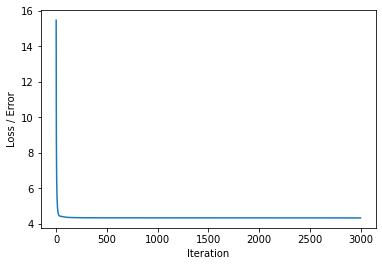

In [ ]:
plt.plot(err_ista)
plt.xlabel('Iteration')
plt.ylabel('Loss / Error')
plt.show()

# Least Squares
- Ordinary Least Squares
- Weighted Least Squares (IRLS)
- Robust Least Squares

## Ordinary Least Squares

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# coefficients of the model
x1, x2, x3 = 0.1, -0.2, 4.0
 
# ground truth
X_gt = [x1, x2, x3]
 
print('X_gt = ', X_gt)
 
# create a coordinate matrix
n_a = np.linspace(-1, 1, 41)
n_b = np.linspace(-1, 1, 41)
x, y = np.meshgrid(n_a, n_b)
 
# make the estimation
z = a1*x + a2*y + a3

#######################################################
# CASE 1: data is corrupted by gaussian noise         #
#         Regular linear least squares method is used #
#######################################################
 
# let's add some gaussian noise
z_noise = z + 0.1*np.random.standard_normal(z.shape)

X_gt =  [0.1, -0.2, 4.0]


NameError: ignored

---
---
## Robust Least Squares (incomplete)
**ALGORITHM**
```
1) For all data points perform Least Squares and find line of best fit b = Ax + e
2) For every data point find error, e1, e2, e3...en
3) Find largest |ei|, that is largest absolute value of error. This is the point farthest from the regression line and likely to be outlier.
4) Discard the data point with largest magnitude of error ei
4) Repeat steps 1-4 until convergence (that is, solution does not change much upon eliminating a point)
```

In [14]:
import numpy as np

In [25]:
def LS_outlier_rejection(A, b, num_outliers_to_remove):
  """
  Rows in A represent different data points. One row represents one data point
  Columns of A represent dimensions.
  """
  for _ in range(num_outliers_to_remove):
    # Finding solution 
    x,_,_,_ = np.linalg.lstsq(A, b, rcond=-1)

    # Calculating magnitude of errors for each data point
    e = np.abs(b - A@x)

    # Find the data point having largest error, and discard it
    idx_largest_e = np.argmax(e) # would be single num indicating index in error vector
    
    x = np.delete(x, (idx_largest_e), axis=0) # axis=0 since we have to delete row

    return x

In [26]:
A_over = np.array([
             [3,2,1],
             [1,4,4],
             [3,2,8],
             [6,4,2]
])

b = np.array([10, 21, 31, 20])

print(A_over.shape)
print(b.shape)

LS_outlier_rejection(A_over, b)

(4, 3)
(4,)
[7.10542736e-15 7.10542736e-15 3.55271368e-15 1.42108547e-14]
3


In [27]:
A_over

array([[3, 2, 1],
       [1, 4, 4],
       [3, 2, 8],
       [6, 4, 2]])

# Orthogonal matching pursuit (OMP) - incomplete
- Used for underdetermined systems
- Recovery of a high-dimensional sparse signal based on a small number of linear measurements, possibly corrupted by noise
- Link to paper: https://math.mit.edu/~liewang/OMP.pdf
- https://github.com/davebiagioni/pyomp/blob/master/omp.py

In [ ]:
def my_OMP(A, b, num_non_zeros):
  # Get the shape of A
  m, n = A.shape

  # Intialize omega to be an empty set
  omega = set()
  r = b

  for i in range(num_non_zeros):
    C = np.abs(A.T @ r)  # C will of shape nx1
    
    # Getting the position of largest absolute element in C
    l = int(np.where(C == np.max(C))[0][0])

    # Update omega
    omega = omega.union({l})
    
    # Update A_omega
    A_omega = A[:, list(omega)]

    # Calculate x_omega using least squares
    x_omega, _, _, _ = np.linalg.lstsq(A_omega, b, rcond=-1)

    # Update r for next iteration
    r = b - A_omega @ x_omega

  return x_omega, list(omega)

In [ ]:
from sklearn.datasets import make_sparse_coded_signal
import numpy as np

In [ ]:
n_components, n_features = 512, 100
n_nonzero_coefs = 17

# generate the data

# y = Xw
# |x|_0 = n_nonzero_coefs

y, X, w = make_sparse_coded_signal(
    n_samples=1,
    n_components=n_components,
    n_features=n_features,
    n_nonzero_coefs=n_nonzero_coefs,
    random_state=0,
)

(idx,) = w.nonzero()

# distort the clean signal
y_noisy = y + 0.05 * np.random.randn(len(y))

In [ ]:
my_OMP(X, y, len(idx))

(array([ 1.58380476, -0.43116899,  1.68550553, -2.73865906,  0.13193827,
        -1.10099366,  0.30490502, -0.30617707, -0.87322229, -1.36627127,
        -0.09824186, -0.21079998,  1.49132825, -3.23531439, -0.24061129,
         0.09820563,  0.07264699]),
 [195,
  68,
  268,
  269,
  76,
  399,
  467,
  158,
  226,
  355,
  227,
  101,
  359,
  492,
  494,
  46,
  123])

In [ ]:
idx

array([ 46,  68,  76, 101, 123, 158, 195, 226, 227, 268, 269, 355, 359,
       399, 467, 492, 494])

# Iterative Hard Thresholding Algorithm
- For underdetermined systems
- https://eprints.soton.ac.uk/142499/1/BD_NIHT09.pdf

In [ ]:
import numpy as np

In [ ]:
def my_IHTA(A, b, max_iter):
  # init
  m, n = A.shape
  x = np.zeros(m)

  for _ in range(max_iter):
    # calculate residue
    r = b - A @ x

    x = x + A.T @ r


In [ ]:
def largestElement(x, n):
    # Returns the nth largest element of the vector x

    # Number of elements in x
    N = x.shape[0]

    # Boundary check: Handling cases when n < 1 or n > size of vector
    if n > N:
        n = N
    elif n < 1:
        n = 1
    # Sort in descending order and return first n elements
    t = np.sort(x)[::-1]
    return t[n-1] # python index starts at 0

# Soft thresholding function
def softThreshold(x, threshold):
    j = np.abs(x) <= threshold
    x[j] = 0
    j = np.abs(x) > threshold
    x[j] = x[j] - np.sign(x[j])*threshold
    return x

# Hard thresholding function
def hardThreshold(x, threshold):
    j = np.abs(x) < threshold
    x[j] = 0
    return x

def reconstructIHT(A, y, s, max_iter=500, tol=0.001, x=0, verbose=False):
  # recovers a sparse vector x from y using Iterative Hard thresholding Algorithm
  # xhat = reconstructIHT(A, t, T, tol, x, verbose)
  #  Arguments:
  #       A - measurement matrix (sparse)
  #       y - measurements
  #       s - sparsity level required in reconstruction
  #       max_iter - max number of iterations (optional)
  #       tol - stopping criteria (optional)
  #       x - original vector used to print progress of MSE (optional)
  #       verbose - print progress (optional)

  # Length of original signal
  N = A.shape[1]

  # Length of measurement vector
  n = A.shape[0]

  # Initial estimate
  xhat = np.zeros(N)

  # Initial residue
  r = y

  for t in range(max_iter):
    # Pre-threshold value
    gamma = xhat + np.dot(A.T, r)

    # Find the s-th largest coefficient of gamma
    threshold = largestElement(np.abs(gamma), s)

    # Estimate the signal (by hard thresholding)
    xhat = hardThreshold(gamma, threshold)

    # Compute error, print and plot
    if verbose:
      err = np.mean((x-xhat)**2)
      print("iter# = "+str(t) + " MSE = " + str(err))

    # update the residual
    r = y - np.dot(A, xhat)

    # Stopping criteria
    if np.linalg.norm(r)/np.linalg.norm(y) < tol:
      break

  return xhat


if __name__ == '__main__':
    N = 2000 # signal length
    n = 400  # Number of measurements
    k = 50   # Number of non-zero elements

    T = 200 # Number of iterations

    tol = 0.0001 # Tolerance

    # Generate problem instance
    A = np.random.randn(n,N)
    # normalize to columns to have unit norm
    A = A/np.sqrt(np.sum(A**2, axis=0))

    # Calculate L2 norm. For convergence we need L2(A) < 1
    L2_A = np.linalg.norm() # by default it calculates L2

    # Sparse signal x[i] in {+1, -1, 0}
    x = np.sign(np.random.rand(k)-0.5)
    x = np.append(x, np.zeros(N-k))
    x = x[np.random.permutation(np.arange(N))]

    # Generate measurements
    y = np.dot(A, x)

    # Reconstruct using IHT
    xiht = reconstructIHT(A, y, k, T, tol, x=x, verbose=True)

    print("All Close xiht and x :" + str(np.allclose(xiht, x)))

    erriht = np.mean((xiht-x)*(xiht-x))     
    print("Mean Squared Error AMP: " + str(erriht))

iter# = 0 MSE = 0.021400993190586838
iter# = 1 MSE = 0.04093987296336322
iter# = 2 MSE = 0.0938627700963639
iter# = 3 MSE = 0.2064109658320158
iter# = 4 MSE = 0.7088448212398705
iter# = 5 MSE = 2.166349223076336
iter# = 6 MSE = 7.768478344480114
iter# = 7 MSE = 27.63750202768392
iter# = 8 MSE = 103.98758804302314
iter# = 9 MSE = 395.9233048095725
iter# = 10 MSE = 1564.9943843810884
iter# = 11 MSE = 6323.265502164049
iter# = 12 MSE = 26003.026774079557
iter# = 13 MSE = 107778.86610635018
iter# = 14 MSE = 448790.3654620137
iter# = 15 MSE = 1872303.4308151526
iter# = 16 MSE = 7819125.990612724
iter# = 17 MSE = 32702530.816194065
iter# = 18 MSE = 136860243.2961426
iter# = 19 MSE = 572855137.2147657
iter# = 20 MSE = 2400042995.296978
iter# = 21 MSE = 10069631271.351938
iter# = 22 MSE = 42296208967.08475
iter# = 23 MSE = 178113297537.8756
iter# = 24 MSE = 750591085209.6945
iter# = 25 MSE = 3173441253237.709
iter# = 26 MSE = 13478792170788.312
iter# = 27 MSE = 57626116980016.67
iter# = 28 MSE